# Deep Learning Explained

# Module 3 - Lab - Introduction to Deep Neural Networks 

## 1.0 Overview

This lesson introduces you to the basics of neural network architecture in the form of deep forward networks. This architecture is the quintessential deep neural net architecture. In this lab you will learn the following:

- Why is deep learning important and how it relates to representation, learning and inference.
- How a basic preceptron works.
- How to apply different types of loss functions. 
- Understand why nonlinear activation is important and why rectified linear units are a good choice.
- How back propagation works, and how you apply the chain rule of calculus to determine gradient. 
- Understand the architectural trade-off between depth and width in deep networks.

### 1.1 Why is deep learning important?

Deep learning methods are a form of **artificial intelligence (AI)** or **machine intelligence**. More specifically, deep learning algorithms are a type of **machine learning**. 

What properties does machine intelligence require? There have been many answers to this question over the history of computing. In this case, we will take a practical view, sometimes known as **weak AI**. There are three key properties an intelligent machine must have; a **representation** for the AI model, **inference** for the output of the model, and **learning** to train the model. The figure below shows a highly abstracted view of machine intelligence, showing the relationship between representation, learning and inference. 

<img src="img/MachineIntelligence.jpg" alt="Drawing" style="width:600px; height:300px"/>

<center>**Schematic view of machine intelligence**</center>

**That's it!** The entire rest of this course will focus on just these three points: representation, learning and inference!

## 2.0 Forward propagation: The representation problem

To create useful neutral network we need a **representation** that has two important properties.   

First, there needs to be a way to represent complex functions of the input. Without this property, nothing is gained, since there are numerous machine learning algorithms that work with simple representations. We will spend the rest of this section exploring this problem.   

Second, the representation needs to be **learnable**. Quite obviously, no machine intelligence representation is useful if there is not a practical algorithm to learn it. We will take up this problem in another section. 

### 2.1 Linear networks

Let's start with the simplest possible network. It has inputs, and an output. The output is a **afine transformation** of the input values. We say this network performs an afine transformation since there is a bias term $b$. 


<img src="img/LinearNetwork.jpg" alt="Drawing" style="width:400px; height:250px"/>

<center>**Figure 2.1**
**A simple afine network**</center>

This output $y$ of this network is just:

$$y = f(x) = \sum_i w_i \cdot x_i + b$$

This network performs linear regression. Being able to perform only afine transformations, it can't do anything else. 

This representation is certainly learnable. However, it does not gain us anything over familiar linear regression methods. 

### 2.2 The preceptron

To get started, let's have a look at a simple **preceptron** model. The perceptron was proposed by Rosenblatt (1962). He built on the earlier attempts at a neural network models by McCulloch and Pitts (1943) and Heeb (1949). The perceptron adds **nonliner activation** to the afine network. 


<img src="img/Preceptron.jpg" alt="Drawing" style="width:350px; height:250px"/>
<center>**Figure 2.2 Schematic of perceptron with nonlinear activation**</center>

The output $y$ of the perceptron is given by the following:

$$y = f(x) = \sigma \Big( \sum_i w_i \cdot x_i + b \Big)$$

The output of the network is now nonlinear, give the **activation function** $\sigma(x)$. 

But, the preceptron is nothing more than a logistic regression classifier. The fact that the preceptron could only solve linearly separable problems was pointed out by Minsky and Papert (1969). The failure of the preceptron to learn an **exclusive or (XOR)** function is well known. See for example, Section 6.1 in GBC. 

Again, this representation is certainly learnable. However, as before, it does not gain us anything over well known logistic regression models.

### 2.3 Forward networks - A better representation!

The problem with the  perceptron is one of representation. There is no way that this simple network can represent anything but a linearly separable function. To represent more complex functions, we need a more complex network. In more technical terms we need a network with greater **model capacity**. 

What we need is a network with layers of **hidden nodes** with nonlinear activation. The figure below shows a simple example of a neural network with one **hidden layer** with two nodes. Since every node (including inputs) is connected to every other node we call this architecture a **fully connected neural network**.


<img src="img/Hidden.jpg" alt="Drawing" style="width:600px; height:350px"/>
<center>**Figure 2.3  
Fully connected neural network with single hidden layer**</center>

Let's walk through some aspects of these diagrams. 

1. The neural network is divided into three layers. The input layer, the hidden layer and the output layer. 
2. The values in the input layer are multiplied by a weight matrix, $W^1$.
3. The nodes in the hidden layer sum their inputs and add a bias term, $b^1$. 
4. The outputs of the hidden layer nodes are multiplied by a weight vector, $W^2$.
5. The output layer sums the inputs and adds another bias term, $b^2$.

### 2.4 Neural network architectures - Finding representations

The representations achievable by neural network with just a single hidden layer  are quite powerful. In fact, Cybenko (1989) showed that such a network with an infinite number of hidden units using sigmoidal activation can approximate any arbitrary function. Hornik (1991) generalized this to apply to any activation function. We call this theorem the **universal approximation theorem**.  

A universal approximation theorem may seem like a really exciting development; especially if you are a machine intelligence nerd. However, one must be circumspect when viewing such a result. A representation with an infinite number of nodes cannot be learned in any practical sense. Still it is comforting to know that, at least in principle, a representation can be learned for arbitrarily complex problems. 

While infinitely wide networks with a single layer are unrealistic, we are not limited to one layer. In fact, depth is typically more effective at creating complex representations rather than width in neural networks. Depth is measured by the count of hidden layers stacked one on top of the other in the network. Hence, the term deep neural networks. 

The Figure 2.4 below shows the results of an empirical study by Goodfellow, Shlens and Szegedy (2014) of accuracy of the network vs depth. Notice that accuracy increases rapidly with depth until about 8 layers, after which the effect is reduced. 


<img src="img/Accuracy-Layers.jpg" alt="Drawing" style="width:600px; height:350px"/>
<center>**Figure 2.4 Empirical results of accuracy vs. number of layers**  
Diagram from Goodfellow et. al. 2014</center>

Another view of the empirical study by Goodfellow et. al. is shown in Figure 2.5 below. In this case accuracy verses number of model parameters is compared for three different network architectures. The deeper network (11 layers) makes more  efficient use of the parameters in terms of improved accuracy. The number of parameters in a layer is approximately the total number of parameters divided by the number of layers. Notice that for the particular case tested convolutional neural networks are more efficient than fully-connected networks. We will discuss convolutional neural networks in a subsequent lesson. 

Of particular interest is the fact that the fully-connected network and the shallow convolutional neural network appear to be over-fitting as the test accuracy actually decreases as the number of parameters increases. We will discuss the significant problems of over-fitting in neural networks in a subsequent lesson. 


<img src="img/Accuracy-Parameters.jpg" alt="Drawing" style="width:600px; height:350px"/>
<center>**Figure 2.5 Empirical results of accuracy for different network architectures**  
Diagram from Goodfellow et. al. 2014</center>

**Summary:** Deep networks tend to produce better models, with less tendency to over-fit, for a given level of complexity. 

### 2.6 Activation functions

Without a nonlinear activation function, a neural net is just an afine transformation. Afine transformations limit representation to only linearly separable functions. To create more general representations **nonlinear activation functions** are required. 

In present practice, four types of activation functions are generally used for fully connected networks. 

1. **Linear** activation is used for the output layer of regression neural networks. 
2. The **rectilinear** activation function is used for most hidden units. The rectilinear activation function is often referred to as **ReLU**.
3. A **leaky rectilinear** activation acts like a ReLU function for positive inputs, but has a small negative value or leakage for negative input values. The leaky ReLU activation function can improve training for some deep neural networks, as the derivative is not zero below 0. 
3. The **logistic** or **sigmoid** activation function is used for binary classifiers.
4. The **softmax** activation function is used for multi-class classifiers. 

Rectilinear functions are typically used as the activation function for hidden units in neural networks. The rectilinear function is defined at:

$$f(x) = max(0, x)$$

The rectilinear function is linear for positive responses and zero for responses less than 0.0. Notice that the derivatives of the rectilinear function are not continuous. While this might seem to be a problem, in practice, even gradient-based optimization functions work well with this activation function. 

The rectilinear function is plotted in the cell below:

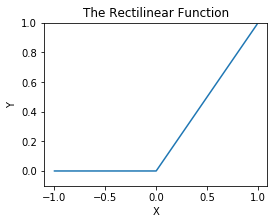

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
## Compute the lectilinear function
def reclu(x): return(max(0,x))
x = [float(x)/100 for x in range(-100, 100)]
y = [reclu(y) for y in x]
## Plot the result
def plot_figs(x,y,title, figsize = (4, 3)):
    plt.figure(figsize=figsize).gca() # define axis
    sns.set_style("darkgrid")
    plt.plot(x, y)
    plt.ylim((-0.1,1.0))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
plot_figs(x,y,'The Rectilinear Function')    

Another widely used activation function is the **logistic** or **sigmoid**. The sigmoid is used as the activation for the output layer of a binary classifier. The general sigmoid function can be written as:

$$\sigma(x) = \frac{L}{1 + e^{-k(x_0-x)}}\\
where\\
L = max\ value\\
k = slope\\
x_0 = sigmoid\ midpoint$$

With $L=1$, $k=1$, and $x_0 = 0$, the logistic function becomes: 

$$\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$$

The sigmoid function can asymptotically approach $0$ or $1$, but will never reach these extreme values. However, because of the rapid decrease in the derivative away from $0$ the sigmoid can **saturate** when using gradient-based training. For this reason, the sigmoid is typically not used for hidden layers in neural networks.   

When used in a binary classifier a threshold is set to determine if the result is $0$ or $1$. The threshold can be adjusted to bias the result as desired. 

The code in the cell below plots the sigmoid function. 

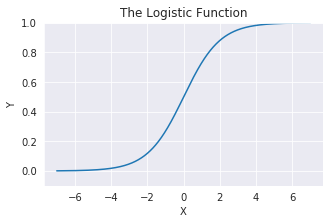

In [ ]:
from math import exp
def sigmoid(x): return exp(x)/(1 + exp(x))
x = [float(x)/100 for x in range(-700, 700)]
y = [sigmoid(y) for y in x]
plot_figs(x,y,'The Logistic Function', figsize = (5,3))    

The **softmax** function or **normalized exponential function** is used for the output activation function of a multi-class classifiers. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $j$ is written as: 

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. The class selected by the classifier is the class with the largest value of $\sigma(z_j)$.

### 2.7 Computational example

Now that we have gone though some basic theory for feed-forward networks, let's try a simple example. We will construct a fully connected network to compute this simple function:

$$y = x_1 - x_2$$

****
**Comment.** You have likely noticed that this function is linear and can be computed easily without a neural network. Of course, that is not the point. We use a simple function to make the results easy to understand. 
****

****
**Note.** The neural network for this example does not require any bias terms. 
****

As a first step, we will create test data for 3 cases; $x_1 > x_2$, $x_1 = x_2$, and $x_1 <x_2$

In [ ]:
x = [(2,1), (1,1), (1,2)]
for x_in in x:
    print(x_in[0] - x_in[1])

1
0
-1


Now that we have our test data and test cases we can move to the next step. We will create the first weight tensor.

In [ ]:
import numpy as np
W_1 = np.array([[1.0, -1.0], [-1.0, 1.0]])
print(W_1)

[[ 1. -1.]
 [-1.  1.]]


We also need the weight tensor, for the second set of weights. 

In [ ]:
W_2 = np.array([1, -1])
print(W_2)

[ 1 -1]


We have the input test cases and the network weights. Now, it is time to compute the results and check them. The code in the cell below performs the feed forward network computation. The first function computes the matrix product of the weights with the input tensor and applies a rectilinear activation function. This function computes the output of the hidden layer given the input tensor. 

$$h = \sigma(W^1 \cdot x)$$

The second function computes the vector product of the weight tensor with the output tensor of the hidden layer which is the output of the network: 

$$o = W^2 \cdot h$$

In [ ]:
def hidden(x, W):
    """Computes the output of the hidden layer"""
    h = np.dot(W, x) # product of weights and input vector
    return np.array([reclu(x) for x in h]) # apply activation function and return

def output(h, W):
    """Computes the result for the hidden layer"""
    return np.dot(W, h) # dot product of weight vector and input vector
    
## Run the test cases and check the results     
for y in x:
        h = hidden(y, W_1)
        print(output(h, W_2))

1.0
0
-1.0


Our first fully connected neural network passes all the tests!

Notice that even a network to compute a simple function requires 6 weights. You can see that for more complex functions any practical algorithm must learn a large number of weights. The limitations of Numpy would quickly become evident for large scale problems involving hundreds of millions of weights. 


*******
**Exercise 1:** The first simple neural network worked as intended. But, what happens if you change the activation of the hidden units? In the cell below, modify the code from the previous example to use sigmodial activation. Use an expanded set of test cases `[(3,1), (2,1), (1,1), (1,2), (1,3)]`. 
*******

In [ ]:
x = [(3,1), (2,1), (1,1), (1,2), (1,3)]


How have the output values changed? Did you need to update the output weight tensor values to get a better approximation of the function? 

## 3.0 Learning in neural networks: Backpropagation

Now that we have a promising representation, we need to determine if it is trainable. The answer is not only yes we can, but that we can do so in a computationally efficient manner, using a cleaver algorithm known as **backpropagation**. 

The backpropagation algorithm was developed independently multiple times. The earliest work on this algorithm was by Kelly (1960) in the context of control theory and Bryson (1961) in the context of dynamic programming. Rumelhart, Hinton and Williams (1986) demonstrated empirically that backpropagation can be used to train neural networks. Their paper marks the start of the modern history of neural networks, and set off the first wave of enthusiasm. 

The backpropagation algorithm requires several components. First, we need a **loss function** to measure how well our representation matches the function we are trying to learn. Second, we need a way to propagate changes in the representation through the complex network For this we will use the **chain rule of calculus** to compute **gradients** of the representation. In the general case, this process requires using automatic differentiation methods. 

The point of backpropagration is to learn the optimal weight for the neural network. The algorithm proceeds iteratively through a series of small steps. Once we have the gradient of the loss function we can update the tensor of weights.

$$W_{t+1} = W_t + \alpha \nabla_{W} J(W_t) $$  
where  
$W_t = $ the tensor of weights or model parameters at step $t$.   
$\alpha\ = $ step size or learning rate.  
$J(W) = $ loss function given the weights.  
$\nabla_{W} J(W) = $ gradient of $J$ with respect to the weights $W$.  

It should be evident that the back propagation algorithm is a form of gradient decent. The weights are updated in small steps following the gradient of $J(W)$ down hill. 

Finally, we need a way evaluate the performance of the model. Without evaluation metrics we have no way to compare the performance of a given model, or compare the performance of several models. 

In the next sections, we will address each of loss functions, gradient computation and performance measurement. 

### 3.1 Loss functions

To train a neural network we must have a **loss function**, also known as a **cost function**. In simple terms, the loss function measures the fit of a model to the training data. The lower the loss, the better the fit. 

To train deep learning models **cross entropy** is often used as a loss function. This is an information theoretic measure of model fit. We can understand cross entropy as follows. 

First define **Shannon entropy** as:

$$\mathbb{H}(I) = E[I(X)] = E[-ln_b(P(X))] = - \sum_{i=1}^n P(x_i) ln_b(P(x_i)$$  
Where:  
$E[X] = $ the expectation of $X$.  
$I(X) = $ the information content of $X$.   
$P(X) = $ probability of $X$.  
$b = $ base of the logarithm.    

This rather abstract formula gives us a way to compute the expected information content of a set of values $X$. The more likely (higher probability) of $X$ the less informative it is. 

To create a loss function from the definition of Shannon entropy we start with the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. The KL divergence is an information theoretic measure of the difference between two distributions, $P(X)$ and $Q(X)$.

$$\mathbb{D}_{KL}(P \parallel Q) = - \sum_{i=1}^n p(x_i)\ ln_b \frac{p(x_i)}{q(x_i)}$$

Ideally, in the case of training a machine learning model we want a distribution $Q(X)$, which is identical to the actual data distribution $P(X)$. 

But, you may say, if we could know $P(X)$ why compute $Q(X)$ at all? Fortunately, we do not have to. We can rewrite the KL divergence as:

$$\mathbb{D}_{KL}(P \parallel Q) = \sum_{i=1}^n p(x_i)\ ln_b p(x_i) - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

Since $P(X)$ is fixed and we wish to find $Q(X)$ when we train our model, we can minimize the term on the right, which is the **cross entropy** defined as:

$$\mathbb{H}(P,Q) = - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

From the formulation of KL divergence above you can see the following.

$$\mathbb{D}_{KL}(P \parallel Q) = \mathbb{H}(P) + \mathbb{H}(P,Q)\\
\mathbb{D}_{KL}(P \parallel Q) = Entropy(P) + Cross\ Entropy(P,Q)$$

Thus, we can minimize divergence by minimizing cross entropy. This idea is both intuitive and computationally attractive. The closer the estimated distribution $q(X)$ is to the distribution of the true underling process $p(X)$, the lower the cross entropy and the lower the KL divergence. 

In general we will not know $p(X)$. In fact, if we did, why would we need to solve a training problem? So, we can use the following approximation.

$$\mathbb{H}(P,Q) = - \frac{1}{N} \sum_{i=1}^n ln_b q(x_i)$$

You may notice, that this approximation, using the average log likelihood, is equivalent to a maximum likelihood estimator (MLE). 

### 3.2 Cross Entropy for Gaussian Likelihood

Let's look at a specific case of a model with Gaussian likelihood. What is the cross entropy? We can start by thinking about the definition of likelihood. 

$$p(data|model) = p(data|f(\theta)) = p(x_i|f(\hat{\mu},\sigma))= \frac{1}{2 \pi \sigma^2} e^{\frac{-(x_i - \hat{\mu})^2}{2 \sigma^2}}$$

We take the negative logarithm of this likelihood model. 

$$-log\big(p(data|model) \big) = - \frac{1}{2}\big( log( 2 \pi \sigma^2) + \frac{(x_i - \hat{\mu})^2}{2 \sigma^2} \big)$$

Now, the first term on the right is a constant, as is the denominator of the second term if we assume known variance. Since our goal is to minimize cross entropy, we can eliminate these quantities and be left with just the following.

$$-(x_i - \hat{\mu})^2$$

This is one issue we need to deal with. Our formulation of cross entropy involves the unknown true distribution of the underling process $p(X)$. However, since $p(x_i)$ is fixed but unknown we can just write the following.

$$min \big( \mathbb{H}(P,Q) \big) \propto argmin_{\mu} \big( - \sum_{i=1}^n (x_i - \hat{\mu})^2 \big)$$

This is just the definition of a Maximum Likelihood Estimator (MLE) for the least squares problem! In fact, since the cross entropy is computed using the negative log likelihood, it will always be minimized by the MLE. 


### 3.3 Chain rule of calculus

Key to the back propagation algorithm is the chain rule of calculus; not to be confused with the chain rule of probability. The chain rule allows us to back propagate gradients though an arbitrarily complex graph of functions. 

Now, suppose there is a function $y = g(x)$, and another function $z = f(y) = f(g(x))$. How do we compute the derivative of $z$ with respect to $x$? Applying the chain rule we get: 

$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}$$

Consider $x \in R^M$ $g(x) \Rightarrow R^M$ and $ f(y) \Rightarrow z \in R$. The chain rule becomes:

$$\frac{\partial z}{\partial x} = \sum_{j \in M} \frac{\partial z}{\partial y_j}\frac{\partial y_j}{\partial x_i}$$

Which we can rewrite as  

$$\nabla_{x}z = \Big( \frac{\partial x}{\partial y} \Big)^T \nabla_{y}z$$  

Here, $\frac{\partial x}{\partial y}$ is the $n x m$ **Jacobian matrix** of partial derivatives. The Jacobian is multiplied by the gradient with respect to $y$, $\nabla_{y}z$. You can think of the Jacobian as a transformation for a gradient with respect to $y$ to what we really want, the gradient with respect to $z$.

### 3.4 Example of finding a gradient. 

Let's work out backpropagation for a very simple neural network with a single hidden layer with two units. This neural network, including the loss function, is shown in Figure 3.1 below. This network has been highly simplified. There are only three layers, input layer, a two unit hidden layer with no bias terms, and a single unit output layer. There are only two weight tensors for this network. Further, the hidden units use rectilinear activation and the output unit uses linear activation. These activation functions have simple partial derivatives.  

<img src="img/LossGraph.jpg" alt="Drawing" style="width:600px; height:300px"/>
<center>**Figure 3.1 
Simple single layer neural network with loss function** </center>

First, we need to work out the forward propagation relationships. We can compute the outputs of the hidden layer as follows.

$$S_{\{1,2\}} = \sigma_h \big( W^1 \cdot X_{\{1,2\}} \big) = \sigma \big( \sum_j W^1_{i,j} x_j \big)$$  

In the same way, the result from the output layer can be computed as follows, since the activation function for this layer is linear. 

$$S_3 = W^2 \cdot S_{\{1,2\}} = \sum_i W^2_i \sigma \big( \sum_j W^1_{i,j} x_j \big)$$

To perform backpropagation, we need fill out the gradient vector by computing $\frac{\partial J(W)}{\partial W}$ for each weight in the model. 

$$\frac{\partial J(W)}{\partial W} = 
\begin{bmatrix} 
\frac{\partial J(W)}{\partial W^2_{11}} \\
\frac{\partial J(W)}{\partial W^2_{12}} \\
\frac{\partial J(W)}{\partial W^2_{21}} \\
\frac{\partial J(W)}{\partial W^2_{22}} \\
\frac{\partial J(W)}{\partial W^1_{1}} \\
\frac{\partial J(W)}{\partial W^1_{2}}
\end{bmatrix}$$

To keep things simple in this example we will just use a non-normalized squared error loss function. This is just the MLE estimator (without normalization) for a Gaussian distribution. 

$$J(W) = - \frac{1}{2} \sum_{l=1}^n (y_l - S_{3,l})^2 $$

Where:  
$y_k = $ the label for the lth case.     
$\hat{y_k} = S_{3,k} =$ the output of the network for the lth case. 

We want to compute the gradients with respect to the input and output tensors:

$$\frac{\partial J(W)}{\partial W^1}, \ \frac{\partial J(W)}{\partial W^2}$$

Let's start with the easier case of the partial derivatives with respect to the output tensor. We can apply the chain rule as follows:

$$\frac{\partial J(W)}{\partial W^2_k} = \frac{\partial  J(W)}{\partial S_{3,k}} \frac{\partial S_{3,k}}{\partial W^2_k}$$

The first partial derivative of the chain is:

$$\frac{\partial J(W)}{\partial S_{3,k}} = \frac{\partial - \frac{1}{2} (y_k - S_{3,k})^2} {\partial S_{3,k}} = y_k - S_{3,k} $$

And, the second partial derivative in the chain, given the linear activation of the output unit, becomes:

$$\frac{\partial S_{3,k}}{\partial W^2_k} = \frac{\partial W^2_k S_{j,k}}{\partial W^2_k}  = S_{j,l}, \ j \in \{1,2\}$$

Multiplying the two components of the chain gives us:

$$\frac{\partial J(W)}{\partial W^2_k} = S_{j,k} (y_k - S_{3,k}), \ j \in \{1,2\} $$

The partial derivatives with respect to the input tensor are a bit more complicated. To apply the chain rule we must work backwards from the loss function. This gives the following chain:

$$\frac{\partial J(W)}{\partial W^1_{i,j}} =  \frac{\partial J(W)}{\partial S_{3}} \frac{\partial S_{3}}{\partial S_{j}} \frac{\partial S_{j}}{\partial W^1_{i,j}}$$

First, we find the right most partial derivative in our chain:

\begin{equation}
\frac{\partial S_j}{\partial W^1_{i,j}} = 
\begin{cases}
     \frac {\partial W^1_{i,j} x_{i,k}}{\partial W^1_{i,j}}, & \text{if $S_j>0$} \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

Which given the ReLU activation results in:

\begin{equation}
\frac{\partial S_j}{\partial W^1_{i,j}} = 
\begin{cases}
    1, & \text{if $S_j>0$}  \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}


The middle partial derivative must account for the nonlinearity:

$$\frac{\partial S_{3}}{\partial S_{j}} = W^2_j$$

We have already computed $\frac{\partial J(W)}{\partial S_{3}}$. Multiplying all three partial derivatives we find:

\begin{equation}
\frac{\partial J(W)}{\partial W^1_{i,j}} = 
\begin{cases}
    (y_k - S_{3,k}) W^2_j, & \text{if $S_j>0$} \\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

Where $S_3$ and $S_{\{1,2 \}} are computed using the relationships given above. 


## 4.0 Network for XOR Function

In an earlier section the work of Minsky and Papert was mentioned. A key failure of the early neural network architectures, such as the perceptron, was the inability to learn function that are not linearly separable. The **exclusive OR** or **XOR** is just such a function. The truth table of the XOR looks like this:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0 | 0 | 0|
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In words, the XOR function is 0 if both inputs are the same, or 1 if both inputs are different. Hence, the reason it is known as exclusive OR. 

****************************
**Exercise 2:** In the cell below, you will create code for a neural network which performs the XOR operation. The following elements are required:

1. An input weight tensor
2. A hidden layer with two units using ReLU activation
3. A output weight tensor
4. An output unit with linear activation

There are 4 possible test (input) cases. Test your code for all cases.  

## 5.0 Performance Metrics

Now that we have the components for training a basic neural network in place we need a way to evaluate the performance. It turns out, there is nothing special evaluation of neural network models as opposed to other machine learning models. 

For regression models, one typically uses the standard metrics such as root mean square error (RMSE), mean absolute error (MAE). 

For classification models, one also typically uses the standard metrics including the confusion matrix, accuracy, precision and recall. 